In [16]:
import pandas as pd
import numpy as np 
import matplotlib
import seaborn as sns
import random

In [6]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Doll03/4IZ480/main/Data/TimeDeposit_10K.csv', sep=";")


In [18]:
random.seed(555)

In [7]:
dataset

,Customer_ID,Gender,Birth_Date,Ref_Date,Marital_Status,Children_Num,Occupation_Category,Total_Income,Payroll_Flag,Business_Flag,...,Transfer_Trans_Amount,Credit_Cards_Installments,Credit_Cards_Payments_Num,Credit_Cards_Purchases_Num,Credit_Cards_Witrhdrawals_Num,Credit_Cards_Payments_Amount,Credit_Cards_Purchases_Amount,Credit_Cards_Witrhdrawals_Amount,Arrears_Months_Max,Time_Deposits_Flag
0,5904453.0,Male,1960-10-17,2008-12-31,Married,2.0,Rentiers,14000.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,F
1,5904524.0,Male,1972-02-22,2008-12-31,Divorced,0.0,Employees,17577.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,F
2,5904672.0,Male,1953-06-24,2008-12-31,Married,1.0,Rentiers,3000.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,F
3,125603.0,Male,1952-09-19,2008-12-31,Married,0.0,Rentiers,14735.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,F
4,1065914.0,Male,1960-08-04,2008-12-31,Single,0.0,Business-Owners,99755.0,0.0,1.0,...,0.0,8.666667,3.500000,2.000000,0.0,275.833333,78.220000,0.0,2.0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5898642.0,Male,1979-06-02,2008-12-31,Single,0.0,Unemployeed,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,F
9996,5901282.0,Female,1961-05-13,2008-12-31,Single,0.0,Employees,49784.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.0,F
9997,5901744.0,Female,1964-09-05,2008-12-31,Married,3.0,Employees,34771.0,0.0,0.0,...,0.0,2.000000,0.833333,0.666667,0.0,32.166666,21.346666,0.0,0.0,F
9998,5902245.0,Female,1975-05-03,2008-12-31,Married,0.0,Business-Owners,3800.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,F


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_ID                       10000 non-null  float64
 1   Gender                            10000 non-null  object 
 2   Birth_Date                        10000 non-null  object 
 3   Ref_Date                          10000 non-null  object 
 4   Marital_Status                    10000 non-null  object 
 5   Children_Num                      10000 non-null  float64
 6   Occupation_Category               10000 non-null  object 
 7   Total_Income                      10000 non-null  float64
 8   Payroll_Flag                      10000 non-null  float64
 9   Business_Flag                     10000 non-null  float64
 10  Saving_Current_Accounts_Flag      10000 non-null  float64
 11  Investment_Products_Flag          10000 non-null  float64
 12  Insur

F    0.9897
T    0.0103
Name: Time_Deposits_Flag, dtype: float64


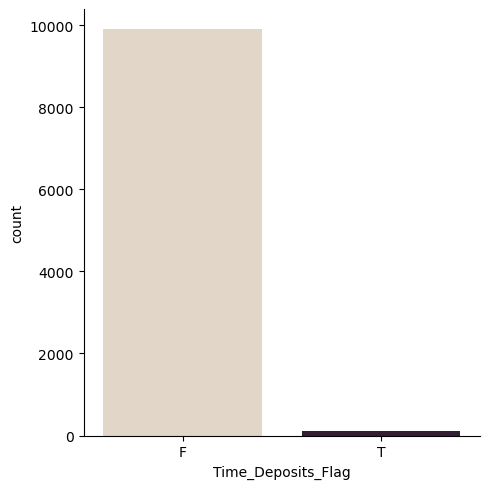

In [9]:

print(dataset['Time_Deposits_Flag'].value_counts(normalize = True))

sns.catplot(data = dataset, x = "Time_Deposits_Flag", kind = "count", palette = "ch:.25")


In [10]:
dataset["Customer_ID"] = dataset["Customer_ID"].astype("object")
dataset["Birth_Date"] = dataset["Birth_Date"].astype("datetime64")
dataset["Ref_Date"] = dataset["Ref_Date"].astype("datetime64")
dataset["Gender"] = dataset["Gender"].astype("category")
dataset["Marital_Status"] = dataset["Marital_Status"].astype("category")
dataset["Children_Num"] = dataset["Children_Num"].astype("int64")
dataset["Occupation_Category"] = dataset["Occupation_Category"].astype("category")
dataset["Payroll_Flag"] = dataset["Payroll_Flag"].astype("bool")
dataset["Time_Deposits_Flag"] = dataset["Time_Deposits_Flag"].astype("bool")
dataset["Business_Flag"] = dataset["Business_Flag"].astype("bool")
dataset["Saving_Current_Accounts_Flag"] = dataset["Saving_Current_Accounts_Flag"].astype("bool")
dataset["Investment_Products_Flag"] = dataset["Investment_Products_Flag"].astype("bool")
dataset["Insurance_Products_Flag"] = dataset["Insurance_Products_Flag"].astype("bool")
dataset["Business_Loans_Flag"] = dataset["Business_Loans_Flag"].astype("bool")
dataset["Housing_Loans_Flag"] = dataset["Housing_Loans_Flag"].astype("bool")
dataset["Consumer_Loans_Flag"] = dataset["Consumer_Loans_Flag"].astype("bool")
dataset["Credit_Cards_Flag"] = dataset["Credit_Cards_Flag"].astype("bool")

In [11]:
#Creating Age variable based on birth year and reference year.
dataset['Age'] = dataset['Ref_Date'].dt.year - dataset['Birth_Date'].dt.year

In [13]:
#Creating boolean variables 
dataset["Credit_Cards_Installments_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Installments']]
dataset["Credit_Cards_Payments_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Payments_Num']]
dataset["Credit_Cards_Purchases_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Purchases_Num']]
dataset["Credit_Cards_Witrhdrawals_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Witrhdrawals_Num']]
dataset["Internet_Trans_Flag"] = [True if i > 0 else False for i in dataset['Internet_Trans_Num']]
dataset["Deposit_Trans_Flag"] = [True if i > 0 else False for i in dataset['Deposit_Trans_Num']]
dataset["Payment_Trans_Flag"] = [True if i > 0 else False for i in dataset['Payment_Trans_Num']]
dataset["Transfer_Trans_Flag"] = [True if i > 0 else False for i in dataset['Transfer_Trans_Num']]
dataset["Withdrawl_Trans_Flag"] = [True if i > 0 else False for i in dataset['Withdrawl_Trans_Num']]

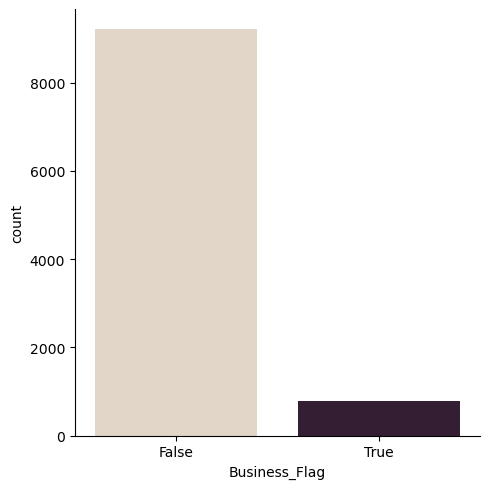

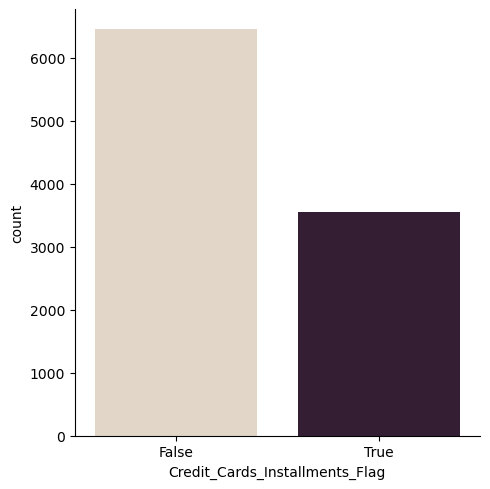

In [22]:
sns.catplot(data = dataset, x = "Business_Flag", kind = "count", palette = "ch:.25")
sns.catplot(data = dataset, x = "Credit_Cards_Installments_Flag", kind = "count", palette = "ch:.25")